<a href="https://colab.research.google.com/github/tselest/ML_DL_projects/blob/main/Fashion_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Imports

import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import random
import itertools

from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
print(f"Training sample: {train_data.shape}") 
print(f"Training label: {train_labels.shape}")

print(f"Testing sample: {test_data.shape}") 
print(f"Testing label: {test_labels.shape}")

Training sample: (60000, 28, 28)
Training label: (60000,)
Testing sample: (10000, 28, 28)
Testing label: (10000,)


In [9]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [15]:
train_data.min(), train_data.max()

(0, 255)

In [16]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

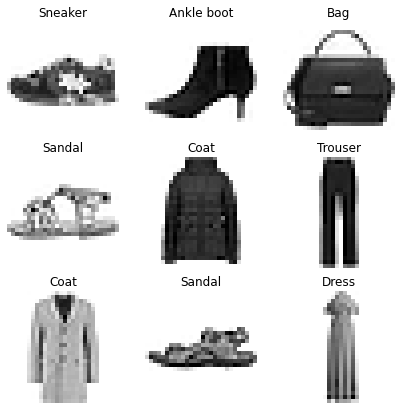

In [76]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(7, 7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
classifier = Sequential()
classifier.add(Flatten(input_shape=(28, 28))) # input layer (we had to reshape 28x28 to 784)
classifier.add(Dense(4, activation="relu"))
classifier.add(Dense(4, activation="relu"))
classifier.add(Dense(10, activation="softmax")) # output shape is 10, activation is softmax


# Compile the model
classifier.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = classifier.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

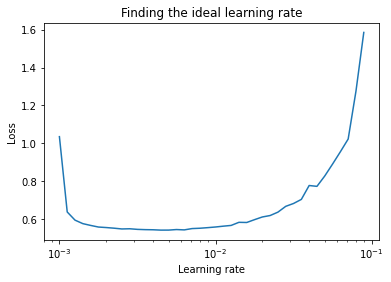

In [22]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create the model
fashion_classifier = Sequential()
fashion_classifier.add(Flatten(input_shape=(28, 28))) # input layer (we had to reshape 28x28 to 784)
fashion_classifier.add(Dense(16, activation="relu"))
fashion_classifier.add(Dense(8, activation="relu"))
fashion_classifier.add(Dense(4, activation="relu"))

fashion_classifier.add(Dense(10, activation="softmax")) # output shape is 10, activation is softmax


# Compile the model
fashion_classifier.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=Adam(lr=0.001),
                 metrics=["accuracy"])


# Fit the model
find_lr_history = fashion_classifier.fit(train_data,
                                         train_labels,
                                         epochs=100, # model already doing pretty good with current LR, probably don't need 100 epochs
                                         validation_data=(test_data, test_labels),
                                        )

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5049 - accuracy: 0.4563 - val_loss: 0.7094 - val_accuracy: 0.7923
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6589 - accuracy: 0.8035 - val_loss: 0.6208 - val_accuracy: 0.8033
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5673 - accuracy: 0.8170 - val_loss: 0.5633 - val_accuracy: 0.8092
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5175 - accuracy: 0.8279 - val_loss: 0.5542 - val_accuracy: 0.8105
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4999 - accuracy: 0.8289 - val_loss: 0.5324 - val_accuracy: 0.8181
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4846 - accuracy: 0.8353 - val_loss: 0.5373 - val_accuracy: 0.8159
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4637 - accuracy: 0.8410 - val_loss: 0.5010 - val_ac

In [61]:
# Evaluate our model on the test set
loss, accuracy = fashion_classifier.evaluate(test_data, test_labels)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.8528
Model loss on the test set: 0.46754056215286255
Model accuracy on the test set: 85.28%


In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

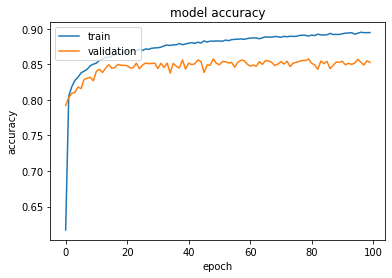

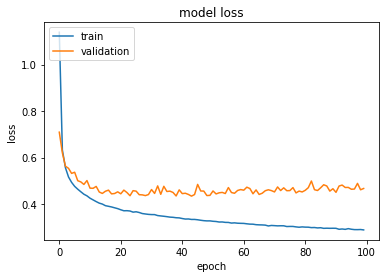

In [51]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  #fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [53]:
# Make predictions with the most recent model
y_probs = fashion_classifier.predict(test_data) # "probs" is short for probabilities

In [54]:
y_probs[1]

array([1.9607300e-05, 2.5329790e-23, 8.9331049e-01, 2.2716216e-08,
       2.2046354e-02, 1.1690424e-28, 8.4623523e-02, 1.7894598e-26,
       2.7550568e-11, 4.5562724e-15], dtype=float32)

In [55]:
# See the predicted class number and label for the first example
y_probs[2].argmax(), class_names[y_probs[2].argmax()]

(1, 'Trouser')

In [56]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

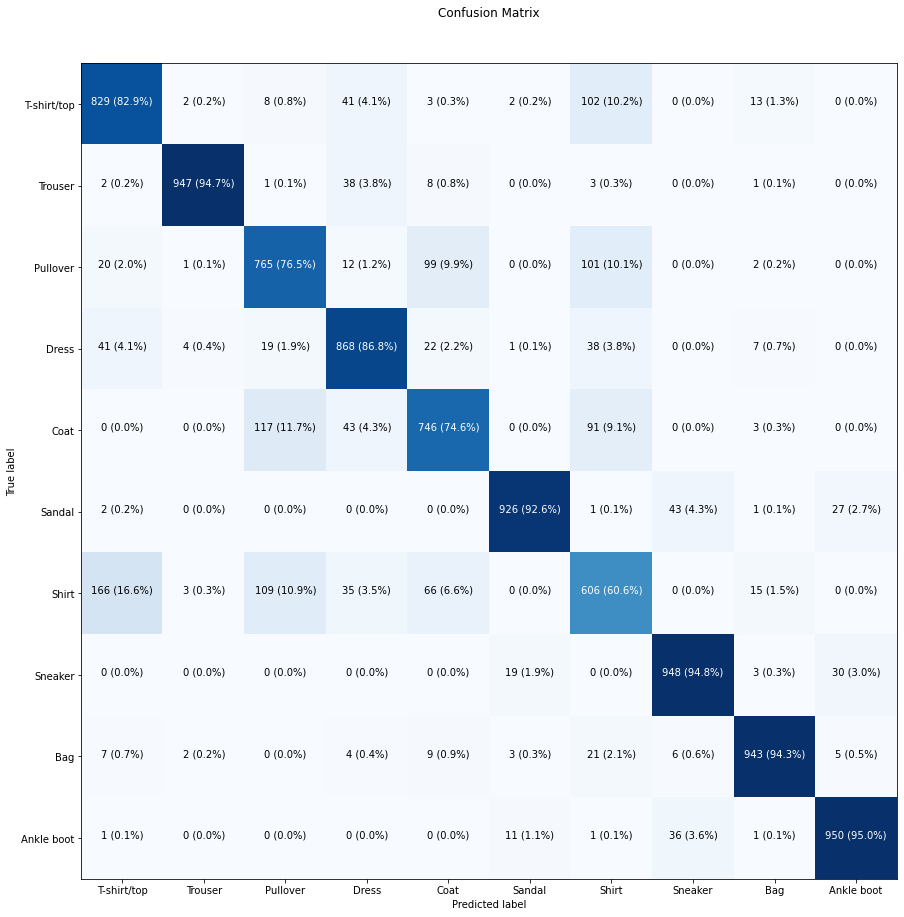

In [57]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [47]:
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

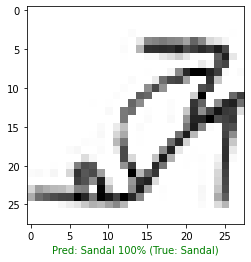

In [48]:
# Check out a random image as well as its prediction
plot_random_image(model=fashion_classifier, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [91]:
def build_classifier(hp):
    classifier = Sequential()
    classifier.add(Flatten(input_shape=(28, 28)))
    classifier.add(Dense(units=hp.Int('units_1',
                                        min_value=16,
                                        max_value=256,
                                        step=32),
                           activation='relu'))
    
    classifier.add(Dense(units=hp.Int('units_2',
                                        min_value=16,
                                        max_value=256,
                                        step=32),
                           activation='relu'))
    
    classifier.add(Dense(units=hp.Int('units_3',
                                        min_value=16,
                                        max_value=256,
                                        step=32),
                           activation='relu'))
    
    classifier.add(Dense(10, activation='softmax'))

    classifier.compile(
        optimizer=Adam(lr=0.001),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy'])
    return classifier

In [79]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 4.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=410cbd43b40a13eb4db9ef08f26cc3b54f5102d83eda59f2d434eca8d0db0bca
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=872db50cdd2d77bb001422c95b2a46a28dbce37b2647c984c258d3f6666c636a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [80]:
from kerastuner import  RandomSearch

In [92]:
tuner = RandomSearch(
    build_classifier,
    objective='val_accuracy',
    max_trials=40,
    executions_per_trial=1,
    project_name='Fashion_mnist')

In [93]:
tuner.search(train_data,
             train_labels,
             epochs=10, 
             validation_data=(test_data, test_labels),
             )

Trial 40 Complete [00h 01m 04s]
val_accuracy: 0.8870000243186951

Best val_accuracy So Far: 0.8901000022888184
Total elapsed time: 00h 34m 18s
INFO:tensorflow:Oracle triggered exit


In [94]:
best = tuner.get_best_models(num_models=1)[0]
best.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 208)               163280    
_________________________________________________________________
dense_1 (Dense)              (None, 144)               30096     
_________________________________________________________________
dense_2 (Dense)              (None, 48)                6960      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                490       
Total params: 200,826
Trainable params: 200,826
Non-trainable params: 0
_________________________________________________________________


In [95]:
best.evaluate(test_data, test_labels, 
                    verbose=0)

[0.3177826404571533, 0.8901000022888184]

In [96]:
kt_preds = best.predict(test_data)

In [97]:
y_preds = kt_preds.argmax(axis=1)

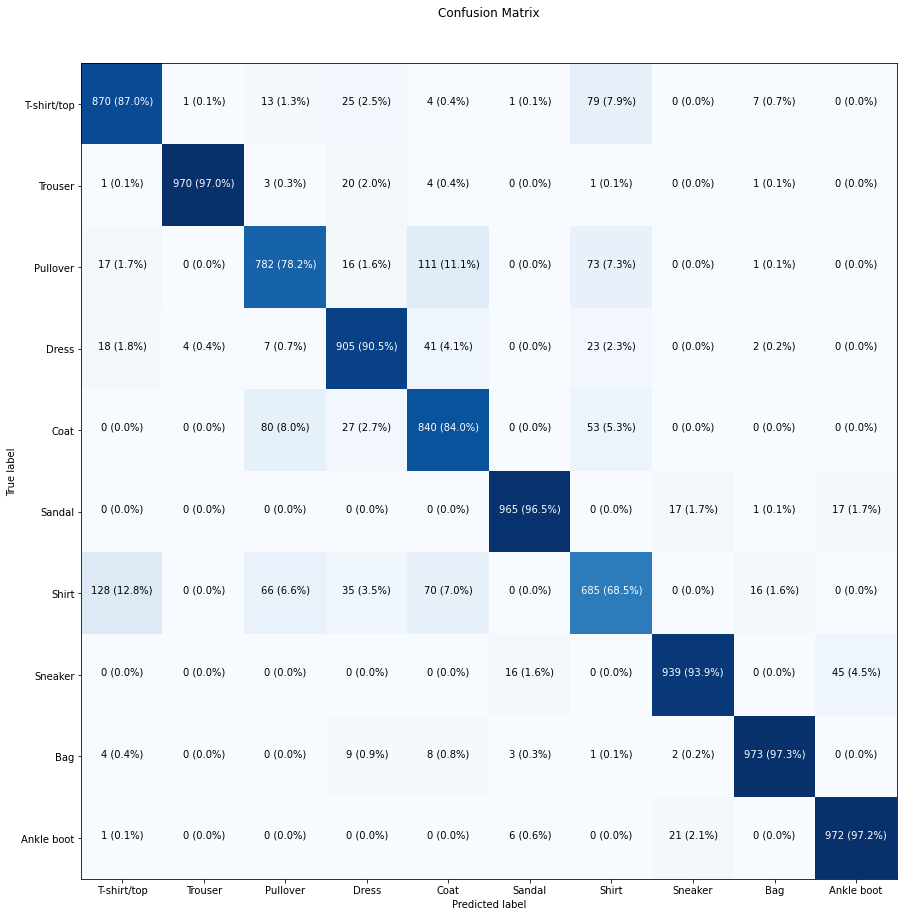

In [98]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

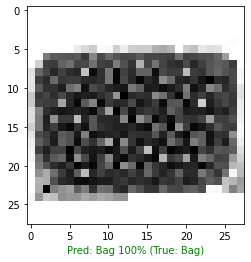

In [102]:
plot_random_image(model=best, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)